In [ ]:
import openpyxl
columns = ['category','name','describe','price','size','stock','count']

def product(put):
    file = openpyxl.Workbook()
    page = file.create_sheet('第一頁',0)
    title= [i for i in columns]
    page.append(title)
    for shoes in put:
#         print(list(shoes.values()))
        page.append(list(shoes.values()))
    file.save('SHOES.xlsx')
        
item=[]  #資料檔在All_data.txt
product(item)

----------------

In [ ]:
!pip install python-time


In [35]:
import pandas as pd 
import numpy as np
import time
import random
import openpyxl

import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

data = pd.read_excel('Momentanee.xlsx')

In [ ]:
data.isnull().sum()        #每個欄位有幾個遺失值

In [ ]:
data['quantity']=data[['quantity']].astype(int)

In [ ]:
data['price']=data['price'].fillna(6980)       #price遺失值都填入 $6980

In [ ]:
data['price']=data[['price']].astype(int)     #price轉成int

In [ ]:
data['stock']=pd.DataFrame(np.random.randint(low=3,high=15,size = 945))    #stock填入隨機數

In [ ]:
data['count']=pd.DataFrame(np.random.randint(low=1,high=8,size=945))      #count填入隨機數

In [ ]:
data['quantity']=pd.DataFrame(np.random.randint(0,37,size=945))           #quantity填入隨機數

In [ ]:
# describe 沒有資料 > 修改
data['describe']=data['describe'].str.replace("沒有資料","尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例更完美。融合繽紛亮片更顯時髦出眾，讓人無法忽視其存在感")

In [ ]:

startDate = (2020,1,1,0,0,0,0,0,0)#设置开始日期时间元组
endDate = (2021,9,30,23,59,59,0,0,0)#设置结束日期时间元组

start = time.mktime(startDate)#生成开始时间戳
end=time.mktime(endDate)#生成结束时间戳

alldate =[]
#随机生成980个日期字符串
for i in range(980):
    t = random.randint(start,end)          #在开始和结束时间戳中随机取出一个
    time1=time.localtime(t)                #将时间戳生成时间元组
    date=time.strftime("%Y-%m-%d",time1)   #将时间元组转成格式化字符串（1976-05-21）
    alldate.append(date)
data['date']=alldate

In [36]:
data

,category,name,describe,price,size,stock,count,date,quantity
0,高跟,Alma,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,6280,37,14,3,2020-01-02,24
1,高跟,Allie,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,37,6,3,2021-02-27,36
2,高跟,Allie,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,38,8,3,2020-09-22,5
3,高跟,380799,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,37,11,3,2020-10-17,18
4,高跟,380671,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5980,37,7,3,2020-03-25,36
...,...,...,...,...,...,...,...,...,...
940,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,4,9,6,2020-02-11,23
941,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,5,12,2,2020-07-02,14
942,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,6,7,5,2020-09-19,20
943,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,7,12,1,2020-02-16,21


In [37]:
data['date']=pd.to_datetime(data['date'])    #將日期轉換為datetime類型

In [38]:
data.set_index('date',inplace=True)         #把日期設為index

In [5]:
spring=data.loc['2020-03':'2020-05']        #取出春季時間

<ipython-input-5-2599cc1e3c0d>:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  spring=data.loc['2020-03':'2020-05']        #取出春季時間


In [6]:
spring=spring.sort_values(by=['date'])      #排序時間

In [7]:
spring

,category,name,describe,price,size,stock,count,quantity
date,,,,,,,,
2020-03-02,男鞋,ARTHUR,"傳統牛津鞋搭配鱷魚壓紋,呈現出奢華和專業。",8200,5.5,8,3,1
2020-03-03,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,大童2,13,2,19
2020-03-05,靴子,380778,打造專屬自己個性的時尚風格，獨樹一格的鉚釘方扣，讓靴款保持極簡俐落的模樣，輕鬆展現俐落前衛的...,4261,38,6,3,4
2020-03-06,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,12,11,2,35
2020-03-06,高跟,380648,黑色鏡面皮質，展現俐落的氣勢及態度，完美詮釋自己的時尚風格。,5980,39,7,2,4
...,...,...,...,...,...,...,...,...
2020-05-28,童鞋,Sally,尺寸建議:版型正常,4304,37,14,1,3
2020-05-29,涼鞋,Giselle,細緻水鑽構成的簡約設計，締造出鮮明的形象，為穿搭注入閃亮元素，營造優雅氛圍，透露出一絲活力氣息。,4936,40,11,3,31
2020-05-30,低跟,Vesta,新穎鞋跟彰顯不羈的個性，強勢尖頭增添自信風采，繽紛色塊跳脫框架，翻玩復古瑪莉年代。,5980,36.5,12,5,20


In [ ]:
springsale=pd.DataFrame(spring)
springsale.to_excel('spring2020.xlsx')

In [8]:
catespring=spring.groupby('category')     #分類

In [9]:
catespring.describe()                

price                                                              \
         count         mean           std     min      25%     50%     75%   
category                                                                     
低跟        19.0  5809.631579   1642.967140  4280.0  4980.00  5280.0  5980.0   
平底        23.0  4736.521739   1003.551007  2980.0  4130.00  4980.0  4980.0   
涼鞋         8.0  6182.000000   2456.149833  3980.0  3980.00  6068.0  7200.0   
男鞋        20.0  5595.000000   1280.737863  3980.0  4980.00  4980.0  5435.0   
童鞋        12.0  2790.333333    564.180392  1980.0  2680.00  2680.0  2980.0   
靴子         8.0  5877.375000   1763.975051  3237.0  4294.75  6417.5  7200.0   
高跟        50.0  9630.380000  12995.123288  2992.0  5289.00  6800.0  7880.0   

                  stock            ... count      quantity             \
              max count      mean  ...   75%  max    count       mean   
category                           ...                                  
低跟        10564.0  19.0  9.263158  ...  5.00  7.0     19.0  24.052632   
平底         6280.0  23.0  8.391304  ...  5.00  7.0     23.0  18.565217   
涼鞋        10980.0   8.0  8.625000  ...  4.50  7.0      8.0  17.125000   
男鞋         8200.0  20.0  9.300000  ...  6.25  7.0     20.0  18.300000   
童鞋         4304.0  12.0  9.416667  ...  6.00  7.0     12.0  24.000000   
靴子         7980.0   8.0  7.875000  ...  6.00  7.0      8.0  12.875000   
高跟        69800.0  50.0  7.780000  ...  6.00  7.0     50.0  18.180000   

                                                    
                std   min    25%   50%   75%   max  
category                                            
低跟         7.129545  12.0  19.00  23.0  29.5  36.0  
平底        10.352102   1.0  11.00  19.0  26.0  36.0  
涼鞋        15.495967   0.0   0.75  19.0  31.5  34.0  
男鞋         7.814292   1.0  14.00  19.0  22.0  32.0  
童鞋        10.392305   3.0  18.00  24.0  33.5  35.0  
靴子         8.322731   3.0   6.25  12.5  18.5  26.0  
高跟         9.836811   1.0   9.50  18.5  26.5  36.0  

[7 rows x 32 columns]

In [10]:
catespring['quantity'].sum()            #春季各類銷售總數

category
低跟    457
平底    427
涼鞋    137
男鞋    366
童鞋    288
靴子    103
高跟    909
Name: quantity, dtype: int64

In [ ]:
springsale=pd.DataFrame(spring)
springsale.to_excel('spring2020.xlsx')

In [11]:
catespring['name'].describe()            #春季各款銷售最好鞋款

,count,unique,top,freq
category,,,,
低跟,19,11,380680,3
平底,23,14,Claire,4
涼鞋,8,5,Eva,3
男鞋,20,10,AVERY,4
童鞋,12,6,Little Elsa,5
靴子,8,6,Bianca,2
高跟,50,30,Dalia,5


In [14]:
bestsell=catespring['name'].describe() 
springsell=pd.DataFrame(bestsell)
springsell.to_excel('springsell2020.xlsx')  

In [23]:
df1=pd.DataFrame(pd.read_excel('Momentanee.xlsx' , sheet_name = 'Sheet1'))
df2=pd.DataFrame(pd.read_excel('springsell2020.xlsx' , sheet_name = 'Sheet1'))
result=pd.concat([df1,df2],sort = False)            #合併兩個excel
writer=pd.ExcelWriter('resultspring.xlsx')
result.to_excel(writer,index=False)
writer.save()

In [39]:
summer=data.loc['2020-06':'2020-08']   #取出夏季時間

In [40]:
summer=summer.sort_values(by=['date'])      #排序時間

In [41]:
summer

,category,name,describe,price,size,stock,count,quantity
date,,,,,,,,
2020-06-01,童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,13,5,5,1
2020-06-01,童鞋,Little Eliana,花團錦簇妝點足間，蕊心幾顆晶瑩朝露。粉嫩清新氣質出眾，優雅宛若森林精靈。,4358,40,10,4,26
2020-06-02,低跟,Mandy,尖頭楦型可拉長整體比例，特殊圓跟好穿又穩固!,5280,38,10,1,11
2020-06-02,高跟,Shawna,耀眼光澤感禮鞋宛如宮廷中交錯踩踏步伐的女伶，色澤閃耀燦若金秋，耀眼的魅力演繹著極致風華。,6280,37,7,1,30
2020-06-05,涼鞋,Giselle,細緻水鑽構成的簡約設計，締造出鮮明的形象，為穿搭注入閃亮元素，營造優雅氛圍，透露出一絲活力氣息。,8188,36,5,1,34
...,...,...,...,...,...,...,...,...
2020-08-27,高跟,Vanessa,以米白為主視覺，運用透膚細紗材質綴上流蘇水鑽，領導流行又顯優雅高貴。,12800,39.5,7,1,18
2020-08-28,高跟,380565A,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,4980,35,5,6,8
2020-08-28,平底,380743,金屬亮面皮革格外醒目，搭配T字細帶設計，打造低調奢華的輕時尚美學,3280,37,6,1,27


In [ ]:
summersale=pd.DataFrame(summer)
summersale.to_excel('summer2020.xlsx')

In [42]:
catesummer=summer.groupby('category')     #分類

In [43]:
catesummer['quantity'].sum()              #夏季各類銷售總數

category
低跟    216
平底    683
涼鞋    172
男鞋    332
童鞋    127
高跟    733
Name: quantity, dtype: int64

In [47]:
sumbest=catesummer['name'].describe()  #夏季各款銷售最好鞋款

,count,unique,top,freq
category,,,,
低跟,11,8,380684,3
平底,32,16,Claire,8
涼鞋,11,8,Medea,2
男鞋,18,7,BARTON,4
童鞋,10,6,Little Elsa,4
高跟,44,26,380648,5


In [45]:
sumsell=pd.DataFrame(sumbest)
sumsell.to_excel('sumsell.xlsx')

In [46]:
df1 = pd.DataFrame(pd.read_excel('Momentanee.xlsx' , sheet_name = 'Sheet1'))
df2 = pd.DataFrame(pd.read_excel('sumsell.xlsx' , sheet_name = 'Sheet1'))
resultsummer=pd.concat([df1,df2],sort = False)  
writer=pd.ExcelWriter('resultsummer.xlsx')
resultsummer.to_excel(writer,index=False)
writer.save()

In [48]:
autumn=data.loc['2020-09':'2020-11']   #取出秋季時間

In [ ]:
autumn=autumn.sort_values(by=['date'])      #排序時間

In [ ]:
autumn

In [ ]:
autumnsale=pd.DataFrame(autumn)
autumnsale.to_excel('autumn2020.xlsx')

In [50]:
cateautumn=autumn.groupby('category')     #分類

In [51]:
cateautumn['quantity'].sum()              #秋季各類銷售總數

category
低跟     202
平底     725
涼鞋     121
男鞋     237
童鞋     187
靴子     138
高跟    1064
Name: quantity, dtype: int64

In [53]:
autbest=cateautumn['name'].describe()            #秋季各款銷售最好鞋款

In [54]:
autsell=pd.DataFrame(autbest)
autsell.to_excel('autsell.xlsx')

In [55]:
df1 = pd.DataFrame(pd.read_excel('Momentanee.xlsx' , sheet_name = 'Sheet1'))
df2 = pd.DataFrame(pd.read_excel('autsell.xlsx' , sheet_name = 'Sheet1'))
resultautumn=pd.concat([df1,df2],sort = False)  
writer=pd.ExcelWriter('resultautumn.xlsx')
resultautumn.to_excel(writer,index=False)
writer.save()

In [56]:
winter=data.loc['2020-12':'2021-02']   #取出冬季時間

In [ ]:
winter=winter.sort_values(by=['date'])      #排序時間

In [ ]:
winter

In [ ]:
wintersale=pd.DataFrame(winter)
wintersale.to_excel('winter2020.xlsx')

In [57]:
catewinter=winter.groupby('category')     #分類

In [ ]:
catewinter['quantity'].sum()              #冬季各類銷售總數

In [59]:
winbest=catewinter['name'].describe()            #冬季各款銷售最好鞋款

In [60]:
winsell=pd.DataFrame(winbest)
winsell.to_excel('winsell.xlsx')

In [61]:
df1 = pd.DataFrame(pd.read_excel('Momentanee.xlsx' , sheet_name = 'Sheet1'))
df2 = pd.DataFrame(pd.read_excel('winsell.xlsx' , sheet_name = 'Sheet1'))
resultwinter=pd.concat([df1,df2],sort = False)  
writer=pd.ExcelWriter('resultwinter.xlsx')
resultwinter.to_excel(writer,index=False)
writer.save()

In [ ]:
last_summer=data.loc['2021-06':'2021-08']   #取出2021夏季時間  #跟去年比較

In [ ]:
last_summer=last_summer.sort_values(by=['date'])      #排序時間

In [ ]:
last_summer

In [ ]:
lastsummersale=pd.DataFrame(last_summer)
lastsummersale.to_excel('summer2021.xlsx')

In [ ]:
cate_last_summer=last_summer.groupby('category')     #分類

In [ ]:
cate_last_summer['quantity'].sum()              #夏季各類銷售總數

In [ ]:
cate_last_summer['name'].describe()            #夏季各款銷售最好鞋款

In [ ]:
mid_year=data.loc['2020-06':'2020-06']   #取出2020 6月年中慶

In [ ]:
mid_year=mid_year.sort_values(by=['date'])      #排序時間

In [ ]:
mid_year

In [ ]:
midyearsale=pd.DataFrame(mid_year)
midyearsale.to_excel('midyearsale.xlsx')

In [ ]:
cate_mid_year=mid_year.groupby('category')     #分類

In [ ]:
cate_mid_year['quantity'].sum()              #年中慶各類銷售總數

In [ ]:
cate_mid_year['name'].describe()            #年中慶各款銷售最好鞋款

In [ ]:
anniversary=data.loc['2020-10':'2020-10']   #取出2020 10月周年慶

In [ ]:
anniversaryr=anniversary.sort_values(by=['date'])      #排序時間

In [ ]:
anniversary

In [ ]:
annisale=pd.DataFrame(anniversary)
annisale.to_excel('annisale.xlsx')

In [ ]:
cate_anniversary=anniversary.groupby('category')     #分類

In [ ]:
cate_anniversary['quantity'].sum()              #周年慶各類銷售總數

In [ ]:
cate_anniversary['name'].describe()            #周年慶各款銷售最好鞋款

In [ ]:
data.isnull().sum()

In [ ]:
type(data)

In [2]:
data['price'].mean()

6924.817989417989

In [ ]:
data.describe()

In [3]:
data.set_index('category')

,name,describe,price,size,stock,count,date,quantity
category,,,,,,,,
高跟,Alma,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,6280,37,14,3,2020-01-02,24
高跟,Allie,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,37,6,3,2021-02-27,36
高跟,Allie,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,38,8,3,2020-09-22,5
高跟,380799,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5280,37,11,3,2020-10-17,18
高跟,380671,尖頭設計，絕對是「氣場」的代名詞，不僅實力展現高冷女神氣質，還可讓你的腿看起來更細，身材比例...,5980,37,7,3,2020-03-25,36
...,...,...,...,...,...,...,...,...
童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,4,9,6,2020-02-11,23
童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,5,12,2,2020-07-02,14
童鞋,Little Elsa,光潔如絲的高級鍛料包覆鞋身，佐以五朵精緻花蕊。蕊心點綴著艾莎公主施以魔法晶瑩剔透的耀眼冰晶，...,2680,6,7,5,2020-09-19,20


In [5]:
Cat=data.groupby("category")

In [ ]:
Cat.describe()

In [6]:
value = Cat.size()
labels = ["Low heel","Flats","Sandals","Oxfords","Child's shoes","Boots","High heel"]


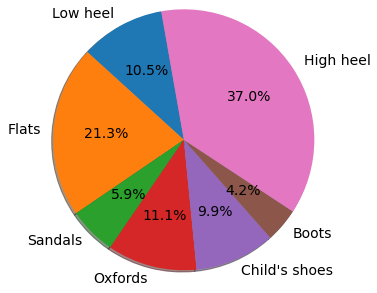

In [7]:
#各鞋款分配比例
plt.pie(value ,labels=labels,radius = 1.5 ,textprops = {"fontsize" : 14} ,autopct = "%0.1f%%"  , shadow =True,startangle = 100)
plt.savefig("pie.png",bbox_inches = "tight" ,pad_inches = 1 ,transparent = True)
plt.show()

In [8]:
category = ["Low heel","Flats","Sandals","Oxfords","Child's shoes","Boots","High heel"]
price = Cat.price.mean()

In [9]:
xpos = np.arange(len(category))

In [ ]:
xpos

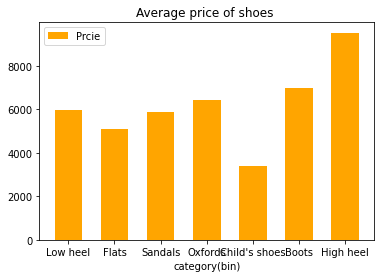

In [10]:
#各鞋款平均售價
plt.xticks(xpos , category)
plt.xlabel("category(bin)")
plt.title("Average price of shoes ")

plt.bar(xpos ,price ,width= 0.6 ,label = "Prcie",color =["orange"])
plt.legend()


In [11]:
all_cat=pd.Series(data['category']).astype('category')

In [12]:
heel=Cat.get_group('高跟')[120:150]

In [13]:
heel=heel.sort_values(by='size')

<function matplotlib.pyplot.show(close=None, block=None)>

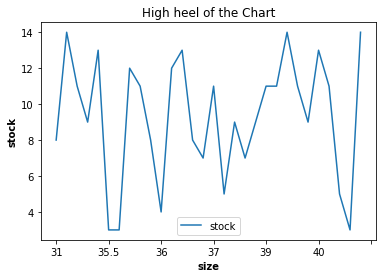

In [14]:
#高跟尺寸與庫存
heel.plot(x='size',y='stock')
plt.title("High heel of the Chart")
plt.xlabel("size" , fontweight='bold')
plt.ylabel("stock", fontweight='bold')
plt.legend()
plt.show

In [ ]:
df=pd.DataFrame(data)
df.to_excel('Momentanee.xlsx')